In [2]:
import argparse
import logging
import os
import sys

import cv2
import mxnet as mx
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

from lightened_cnn import lightened_cnn_b_feature

In [4]:
ctx = mx.gpu(0)
_, model_args, model_auxs = mx.model.load_checkpoint('./lightened_cnn/lightened_cnn', 166)
symbol = lightened_cnn_b_feature()

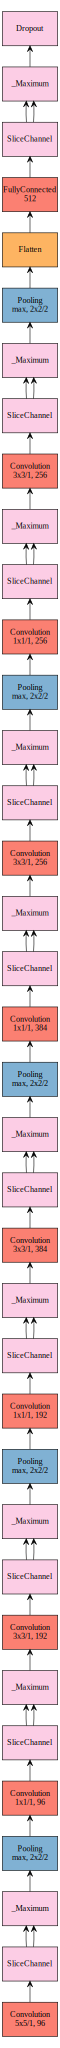

In [5]:
%matplotlib inline
data_shape=(1,1,128,128)
#mx.viz.plot_network(symbol=symbol, shape={"data":data_shape})
mx.viz.plot_network(symbol=symbol)

In [12]:
size=128
img_arr=np.zeros((2,1,size,size),dtype=float)
img=np.expand_dims(cv2.imread("test.png",0),axis=0)
img_arr[0][:]=img/255.0
img=np.expand_dims(cv2.imread("test1.png",0),axis=0)
img_arr[1][:]=img/255.0

In [10]:
model_args['data']=mx.nd.array(img_arr, ctx)
exector = symbol.bind(ctx, model_args ,args_grad=None, grad_req="null", aux_states=model_auxs)
exector.forward(is_train=False)
output = exector.outputs[0].asnumpy()

In [11]:
dotacc=np.dot(output[0],output[1])/np.linalg.norm(output[0])/np.linalg.norm(output[1])
print dotacc

1.0


In [13]:
th = 0.305
if(dotacc>th):
    print 'same'
else:
    print 'not same'

same
